In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np
import scipy.sparse as sp
import math

from kuramoto import *
from wilson_cowan_beta import *

import multiprocessing

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

# Ring Noise

In [31]:
# N = 50
# random_edges = 20
# trials = 2
# t_final = 50
# time_span = (5, 20)

# e_var_max = 0.5
# e_var_min = 0
# e_var_num = 4

# i_var_max = 0.5
# i_var_min = 0
# i_var_num = 4

# excitatory_variances, inhibitory_variances = np.meshgrid(np.linspace(e_var_min, e_var_max, e_var_num), np.linspace(i_var_min, i_var_max, i_var_num))
# excitatory_variances = excitatory_variances.flatten()
# inhibitory_variances = excitatory_variances.flatten()
# kuramoto_measures = []

# for index, (e_var, i_var) in enumerate(zip(excitatory_variances, inhibitory_variances)):
#     trial_kuramoto_measures = []
#     for trial in range(trials):
#         print(f'experiment {index+1}/{e_var_num*i_var_num}\t trial {trial+1}/{trials}' + '\t initializing' + ' '*100, end='\r')
#         wcn = nazemi_jamali_network(N, random_edges=random_edges)
#         θE = -1
#         θI = 8
#         wcn.excitatory_firing_rate = lambda x: relu(x - θE)
#         wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
#         wcn.excitatory_variance = e_var
#         wcn.inhibitory_variance = i_var
#         print(f'experiment {index+1}/{e_var_num*i_var_num}\t trial {trial+1}/{trials}' + '\t simulating' + ' '*100, end='\r')
#         ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)
#         print(f'experiment {index+1}/{e_var_num*i_var_num}\t trial {trial+1}/{trials}' + '\t analysing' + ' '*100, end='\r')
#         trial_kuramoto_measures.append(average_kuramoto(ts, Es.T, time_span=time_span))
#     kuramoto_measures.append(np.mean(trial_kuramoto_measures))
# print('complete' + ' '*300)

In [32]:
N = 50
random_edges = 0
trials = 5
t_final = 20
time_span = (5, t_final)

e_var_max = 0.5
e_var_min = 0
e_var_num = 10

i_var_max = .5
i_var_min = 0
i_var_num = 10

excitatory_variances = np.linspace(e_var_min, e_var_max, e_var_num)
inhibitory_variances = np.linspace(i_var_min, i_var_max, i_var_num)

kuramoto_measures = np.empty((i_var_num, e_var_num))
for (e_index, e_var) in enumerate(excitatory_variances):
    for (i_index, i_var) in enumerate(inhibitory_variances):
        trial_kuramoto_measures = []
        index = i_index + e_index*e_var_num
        print(f'experiment {index+1}/{e_var_num*i_var_num}' + ' '*100, end='\r' )
        def experiment(trial):
            wcn = nazemi_jamali_network(N, random_edges=random_edges)
            θE = -1
            θI = 8
            wcn.excitatory_firing_rate = lambda x: relu(x - θE)
            wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
            wcn.excitatory_variance = e_var
            wcn.inhibitory_variance = i_var
            ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)
            return average_kuramoto(ts, Es.T, time_span=time_span)
        with multiprocessing.Pool(processes=min(multiprocessing.cpu_count(), trials)) as pool:
            trial_kuramoto_measures = pool.map(experiment, range(trials))
        kuramoto_measures[i_index, e_index] = np.mean(trial_kuramoto_measures)
print('complete' + ' '*300)

complete                                                                                                                                                                                                                                                                                                            


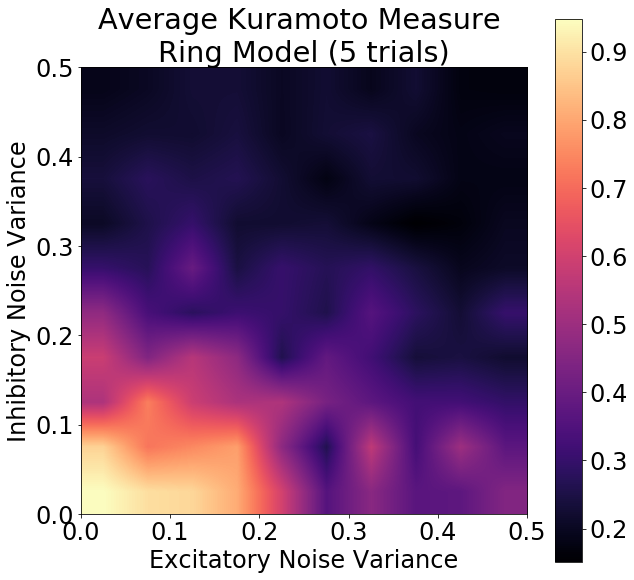

In [33]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(kuramoto_measures[::-1], 
           cmap='magma',
           interpolation='bilinear',
           extent=(e_var_min, e_var_max, i_var_min, i_var_max))
# plt.xticks(np.arange(e_var_num), excitatory_variances)
# plt.yticks(np.arange(i_var_num)[::-1], inhibitory_variances)
# plt.ylim(i_var_num-.5, -.5)
plt.colorbar()
plt.xlabel('Excitatory Noise Variance')
plt.ylabel('Inhibitory Noise Variance')
plt.title(f'Average Kuramoto Measure \nRing Model ({trials} trials)')
plt.show()

In [34]:
kuramoto_measures

array([[0.94804081, 0.89517905, 0.88175851, 0.80823245, 0.60374271,
        0.35927786, 0.46399536, 0.3691851 , 0.37686602, 0.4493652 ],
       [0.87457704, 0.71877555, 0.75087532, 0.78720908, 0.47074043,
        0.26309365, 0.56670437, 0.32870348, 0.50309687, 0.37304659],
       [0.53309019, 0.73346228, 0.58967483, 0.5292168 , 0.53591579,
        0.42909888, 0.37527091, 0.3253116 , 0.32354104, 0.29547486],
       [0.5875968 , 0.44661344, 0.55083617, 0.47173111, 0.26122624,
        0.38701817, 0.32128144, 0.23532707, 0.24554575, 0.2214603 ],
       [0.476614  , 0.3350325 , 0.28122762, 0.31362664, 0.30000654,
        0.25917458, 0.3607566 , 0.28339204, 0.22854593, 0.30211776],
       [0.30115377, 0.2741191 , 0.39722288, 0.24699618, 0.30267755,
        0.27045038, 0.29455641, 0.24388403, 0.19504997, 0.2099547 ],
       [0.20683718, 0.2559113 , 0.30035772, 0.22344264, 0.22305101,
        0.23122564, 0.18532438, 0.15035874, 0.16745416, 0.19886197],
       [0.23780554, 0.27790178, 0.2520864

In [35]:
N = 50
trials = 20
t_final = 50
time_span = (5, t_final)

e_var_max = 0.5
e_var_min = 0
e_var_num = 10

rand_edges_max = 1
rand_edges_min = 0
rand_edges_num = 10

max_rand_edges = N*3

excitatory_variances = np.linspace(e_var_min, e_var_max, e_var_num)
random_edge_percentages = np.linspace(rand_edges_min, rand_edges_max, rand_edges_num)

kuramoto_measures = np.empty((rand_edges_num, e_var_num))
for (e_index, e_var) in enumerate(excitatory_variances):
    for (r_index, rand_edge_percent) in enumerate(random_edge_percentages):
        trial_kuramoto_measures = []
        index = r_index + e_index*e_var_num
        print(f'experiment {index+1}/{e_var_num*rand_edges_num}' + ' '*100, end='\r' )
        def experiment(trial):
            wcn = nazemi_jamali_network(N, random_edges=int(max_rand_edges*rand_edge_percent))
            θE = -1
            θI = 8
            wcn.excitatory_firing_rate = lambda x: relu(x - θE)
            wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
            wcn.excitatory_variance = e_var
            wcn.inhibitory_variance = 0
            ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)
            return average_kuramoto(ts, Es.T, time_span=time_span)
        with multiprocessing.Pool(processes=min(multiprocessing.cpu_count(), trials)) as pool:
            trial_kuramoto_measures = pool.map(experiment, range(trials))
        kuramoto_measures[r_index, e_index] = np.mean(trial_kuramoto_measures)
print('complete' + ' '*300)

complete                                                                                                                                                                                                                                                                                                            


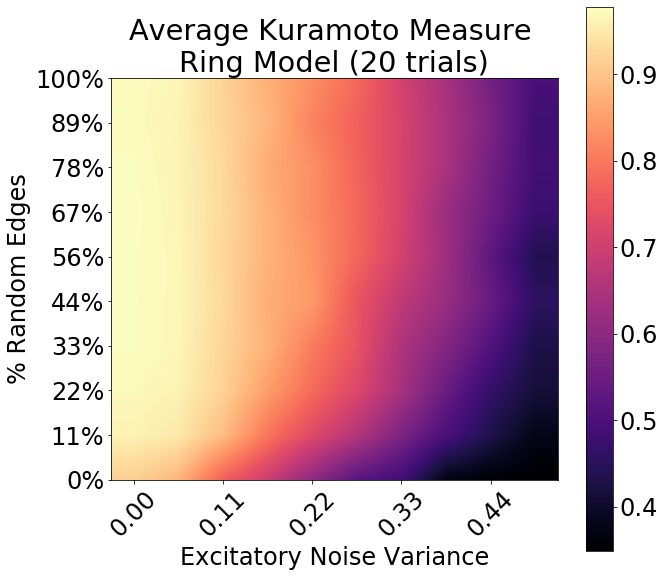

In [36]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(kuramoto_measures[::-1], 
           cmap='magma',
           interpolation='bilinear')#,extent=(e_var_min, e_var_max, rand_edges_min, rand_edges_max))
plt.xticks(np.arange(e_var_num)[::e_var_num//5], [f'{var:.2f}' for var in excitatory_variances[::e_var_num//5]], rotation=45)
plt.yticks(np.arange(rand_edges_num)[::-1], [f'{100*percent:.0f}%' for percent in random_edge_percentages])
# plt.ylim(i_var_num-.5, -.5)
plt.colorbar()
plt.xlabel('Excitatory Noise Variance')
plt.ylabel('% Random Edges')
plt.title(f'Average Kuramoto Measure \nRing Model ({trials} trials)')
plt.show()

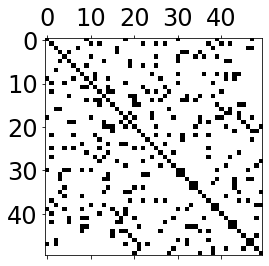

In [9]:
plt.spy(wcn.EE_mat)

# Cartesian Lattice

In [58]:
n = 25
max_rand_edges = 2*(n-1)*n
rand_edge_percent = .25
wcn, x_locations, y_locations = perc_network(n, random_edges=int(max_rand_edges*rand_edge_percent))
N = wcn.NE
θE = -1
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
wcn.excitatory_variance = 0
wcn.inhibitory_variance = 0

In [59]:
t_final = 10
ts, Es, Is = wcn.simulate(10, Δt = 1e-3)
kuramoto = kuramoto_measure(ts, Es.T)

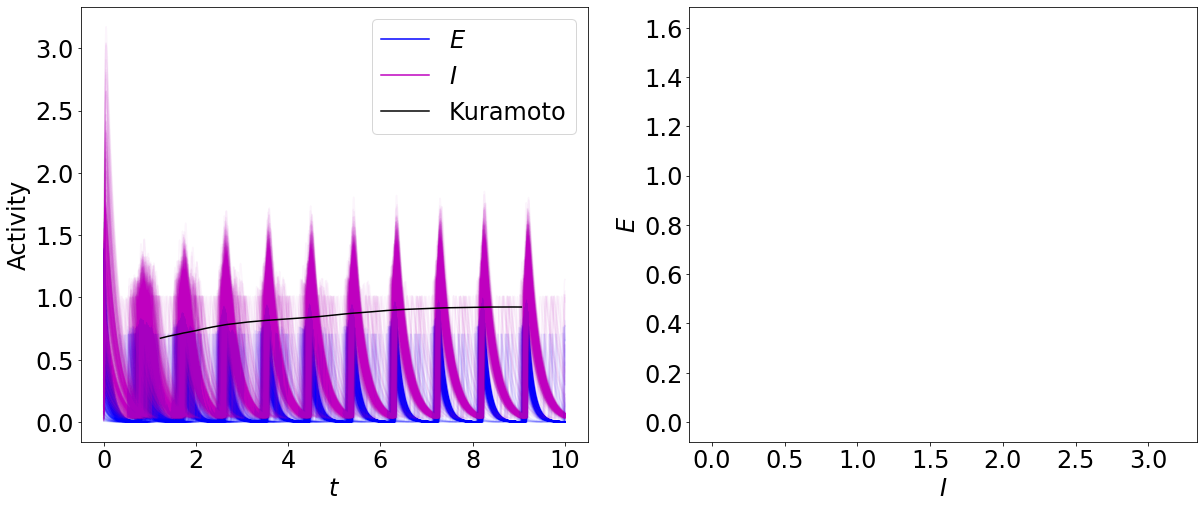

In [60]:
N = n**2
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/n)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/n)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [64]:
n = 25
trials = 20
t_final = 50
time_span = (5, t_final)

e_var_max = 0.3
e_var_min = 0
e_var_num = 10

rand_edges_max = 1
rand_edges_min = 0
rand_edges_num = 10

max_rand_edges = 2*(n-1)*n

excitatory_variances = np.linspace(e_var_min, e_var_max, e_var_num)
random_edge_percentages = np.linspace(rand_edges_min, rand_edges_max, rand_edges_num)

kuramoto_measures = np.empty((rand_edges_num, e_var_num))
for (e_index, e_var) in enumerate(excitatory_variances):
    for (r_index, rand_edge_percent) in enumerate(random_edge_percentages):
        trial_kuramoto_measures = []
        index = r_index + e_index*e_var_num
        print(f'experiment {index+1}/{e_var_num*rand_edges_num}' + ' '*100, end='\r' )
        def experiment(trial):
            wcn, *_ = perc_network(n, random_edges=int(max_rand_edges*rand_edge_percent))
            N = wcn.NE
            θE = -1
            θI = 8
            wcn.excitatory_firing_rate = lambda x: relu(x - θE)
            wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
            wcn.excitatory_variance = e_var
            wcn.inhibitory_variance = 0
            ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)
            return average_kuramoto(ts, Es.T, time_span=time_span)
        with multiprocessing.Pool(processes=min(multiprocessing.cpu_count(), trials)) as pool:
            trial_kuramoto_measures = pool.map(experiment, range(trials))
        kuramoto_measures[r_index, e_index] = np.mean(trial_kuramoto_measures)
print('complete' + ' '*300)

complete                                                                                                                                                                                                                                                                                                            


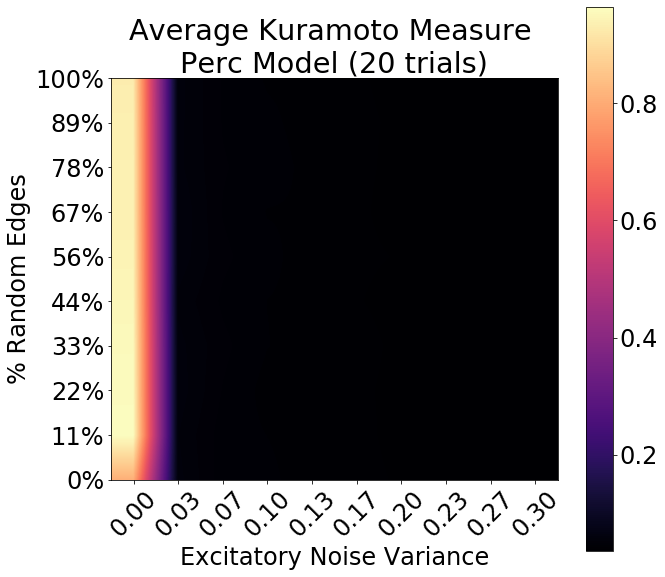

In [65]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(kuramoto_measures[::-1], 
           cmap='magma',
           interpolation='bilinear')#,extent=(e_var_min, e_var_max, rand_edges_min, rand_edges_max))
plt.xticks(np.arange(e_var_num), [f'{var:.2f}' for var in excitatory_variances], rotation=45)
plt.yticks(np.arange(rand_edges_num)[::-1], [f'{100*percent:.0f}%' for percent in random_edge_percentages])
# plt.ylim(i_var_num-.5, -.5)
plt.colorbar()
plt.xlabel('Excitatory Noise Variance')
plt.ylabel('% Random Edges')
plt.title(f'Average Kuramoto Measure \nPerc Model ({trials} trials)')
plt.show()

# Hex Lattice

In [61]:
hex_radius = 25
t_final = 10

wcn, x_locations, y_locations = hex_network(hex_radius, random_edges=int(max_rand_edges*rand_edge_percent))
N = wcn.NE
θE = -1
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
wcn.excitatory_variance = 0
wcn.inhibitory_variance = 0
ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)

In [62]:
kuramoto = kuramoto_measure(ts, Es.T)

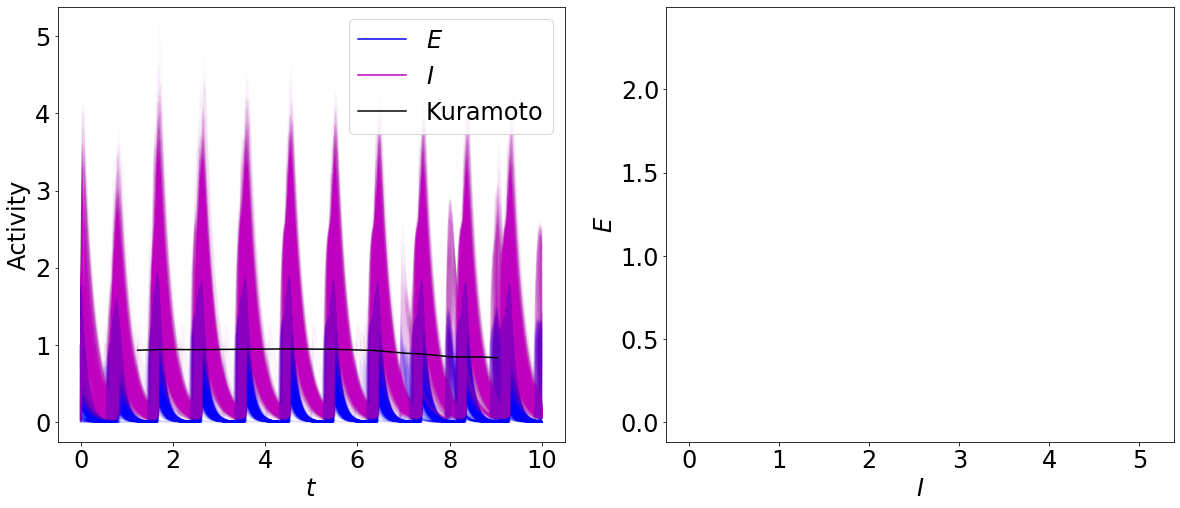

In [63]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/50)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/50)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [36]:
ts

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])

In [ ]:
hex_radius = 25
trials = 20
t_final = 50
time_span = (5, t_final)

e_var_max = 0.3
e_var_min = 0
e_var_num = 10

rand_edges_max = 1
rand_edges_min = 0
rand_edges_num = 10

max_rand_edges = 9*hex_radius**2+3*hex_radius

excitatory_variances = np.linspace(e_var_min, e_var_max, e_var_num)
random_edge_percentages = np.linspace(rand_edges_min, rand_edges_max, rand_edges_num)

kuramoto_measures = np.empty((rand_edges_num, e_var_num))
for (e_index, e_var) in enumerate(excitatory_variances):
    for (r_index, rand_edge_percent) in enumerate(random_edge_percentages):
        trial_kuramoto_measures = []
        index = r_index + e_index*e_var_num
        print(f'experiment {index+1}/{e_var_num*rand_edges_num}' + ' '*100, end='\r' )
        def experiment(trial):
            wcn, x_locations, y_locations = hex_network(hex_radius, random_edges=int(max_rand_edges*rand_edge_percent))
            θE = -1
            θI = 8
            wcn.excitatory_firing_rate = lambda x: relu(x - θE)
            wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
            wcn.excitatory_variance = e_var
            wcn.inhibitory_variance = 0
            ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)
            return average_kuramoto(ts, Es.T, time_span=time_span)
        with multiprocessing.Pool(processes=min(multiprocessing.cpu_count(), trials)) as pool:
            trial_kuramoto_measures = pool.map(experiment, range(trials))
        kuramoto_measures[r_index, e_index] = np.mean(trial_kuramoto_measures)
print('complete' + ' '*300)

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(kuramoto_measures[::-1], 
           cmap='magma',
           interpolation='bilinear')#,extent=(e_var_min, e_var_max, rand_edges_min, rand_edges_max))
plt.xticks(np.arange(e_var_num), [f'{var:.2f}' for var in excitatory_variances], rotation=45)
plt.yticks(np.arange(rand_edges_num)[::-1], [f'{100*percent:.0f}%' for percent in random_edge_percentages])
# plt.ylim(i_var_num-.5, -.5)
plt.colorbar()
plt.xlabel('Excitatory Noise Variance')
plt.ylabel('% Random Edges')
plt.title(f'Average Kuramoto Measure \nPerc Model ({trials} trials)')
plt.show()